In [11]:
%matplotlib inline

from IPython.display import Image
from IPython.core.pylabtools import figsize, getfigs

# imports basicos
import numpy as np
import scipy as sp
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import math
import sys
import traceback

# seaborn
import seaborn as sns
sns.set()

# from pandas.io.pytables import HDFStore

figsize(11, 9)
plt.style.use('ggplot')
pd.set_option('display.max_columns',300)
pd.set_option('display.width', 4000)

#needed to render in notebook
from scipy.optimize import curve_fit



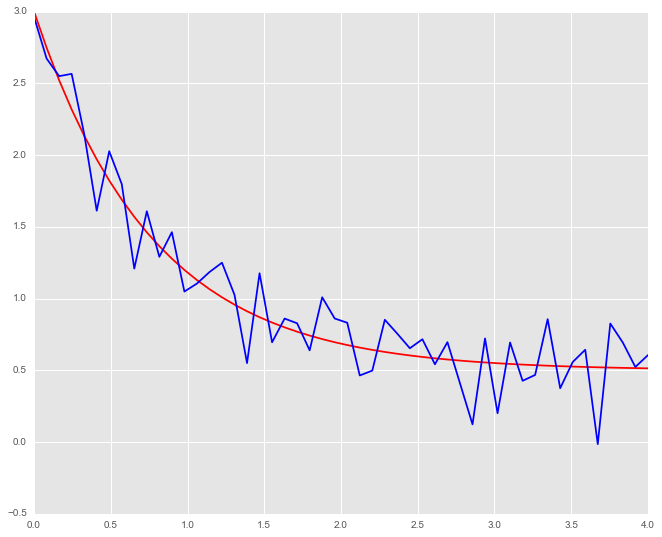

In [12]:
def func(x, a, b, c):
    return a*np.exp(-b*x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

plt.figure()
plt.plot(x,y,"r-")
plt.plot(x,yn,"b-")
plt.show()

In [13]:
popt, pcov = curve_fit(func, x, yn)

In [14]:
popt

array([ 2.46549904,  1.25612555,  0.50227996])

In [15]:
# pcov : 2d array
# The estimated covariance of popt. The diagonals provide the variance of the parameter estimate.
#To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).
# How the sigma parameter affects the estimated covariance depends on absolute_sigma argument, 
# as described above.
print(pcov)

perr = np.sqrt(np.diag(pcov))
perr

[[ 0.01503347  0.00585995 -0.00091049]
 [ 0.00585995  0.01915503  0.00585321]
 [-0.00091049  0.00585321  0.00321674]]


array([ 0.12261105,  0.13840171,  0.05671627])

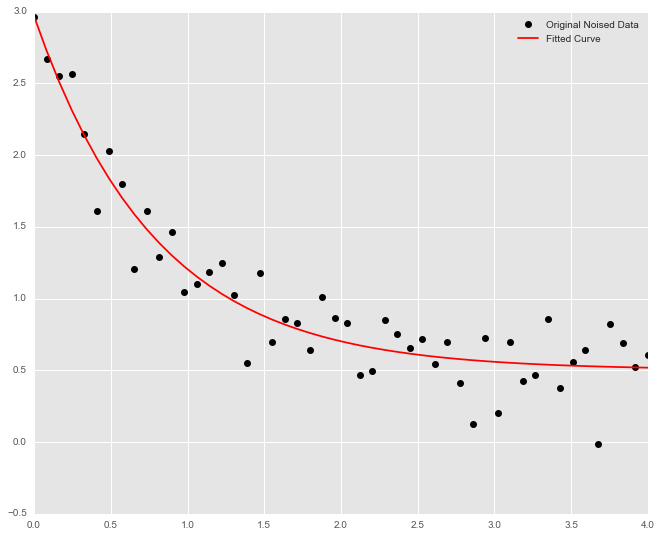

In [16]:
plt.figure()
plt.plot(x, yn, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [18]:
# from http://wiki.scipy.org/Cookbook/FittingData


# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

##########
# Generate data points with noise
##########
num_points = 20

# Note: all positive, non-zero data
xdata = np.linspace(1.1, 10.1, num_points)
ydata = powerlaw(xdata, 10.0, -2.0)     # simulated perfect data
yerr = 0.2 * ydata                      # simulated errors (10%)

ydata += sp.randn(num_points) * yerr       # simulated noisy data

[ 1.02128671 -1.99674634]
[[ 0.01305938 -0.01644752]
 [-0.01644752  0.02430226]]


(1.0, 11)

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=x-large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


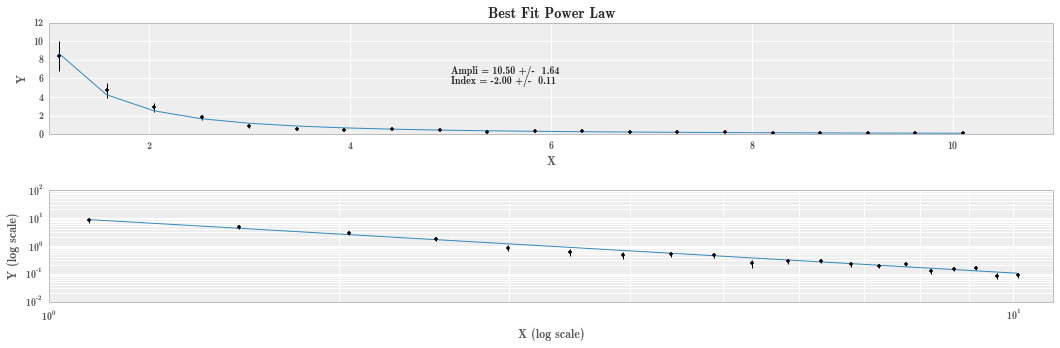

In [22]:
##########
# Fitting the data -- Least Squares Method
##########

# Power-law fitting is best done by first converting
# to a linear equation and then fitting to a straight line.
#
#  y = a * x^b
#  log(y) = log(a) + b*log(x)
#

logx = np.log10(xdata)
logy = np.log10(ydata)
logyerr = yerr / ydata

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err

pinit = [1.0, -1.0]
out = sp.optimize.leastsq(errfunc, pinit,
                       args=(logx, logy, logyerr), full_output=1)

pfinal = out[0]
covar = out[1]
print pfinal
print covar

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[0][0] )
ampErr = np.sqrt( covar[1][1] ) * amp

##########
# Plotting data
##########

plt.clf()
plt.subplot(2, 1, 1)
plt.plot(xdata, powerlaw(xdata, amp, index))     # Fit
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.text(5, 6.5, 'Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
plt.text(5, 5.5, 'Index = %5.2f +/- %5.2f' % (index, indexErr))
plt.title('Best Fit Power Law')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(1, 11)

plt.subplot(2, 1, 2)
plt.loglog(xdata, powerlaw(xdata, amp, index))
plt.errorbar(xdata, ydata, yerr=yerr, fmt='k.')  # Data
plt.xlabel('X (log scale)')
plt.ylabel('Y (log scale)')
plt.xlim(1.0, 11)